# Aula 1 - Análise de Dados com Pandas

In [110]:
import pandas as pd

In [111]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [112]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [114]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [115]:
df.shape

(133349, 11)

In [116]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas:",linhas,"colunas:",colunas)

linhas: 133349 colunas: 11


In [117]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [118]:
df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [119]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [120]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [121]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [122]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [123]:
senioridade = {'SE':'Senior', 'MI':'Pleno', 'EN':'Junior', 'EX': 'Executivo'}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()


,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [124]:
contrato = {'FT': 'Integral', 'PT': 'Parcial', 'CT': 'Contrato', 'FL': 'Freelance'}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
Integral,132563
Contrato,394
Parcial,376
Freelance,16


In [125]:
tamanho_empresa = {'L': 'Grande', 'S': 'Pequena', 'M':'Média'}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [126]:
mapa_trabalho = {0: 'Presencial', 100: 'Remoto', 50: 'Hibrido'}
df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [127]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [128]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 2 - Preparação e limpeza dos Dados

In [135]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [136]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [137]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [138]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [139]:
import numpy as np
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', "Daniele", 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios.head()

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [140]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [141]:
df_cidades = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'Cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belén']
})

df_cidades['cidade_preenchida'] = df_cidades['Cidade'].fillna('Não informado')
df_cidades

,Nome,Cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belén,Belén


In [142]:
df_limpo = df.dropna()

In [143]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [144]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [145]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# Aula 3 - Criação de Gráficos

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}>

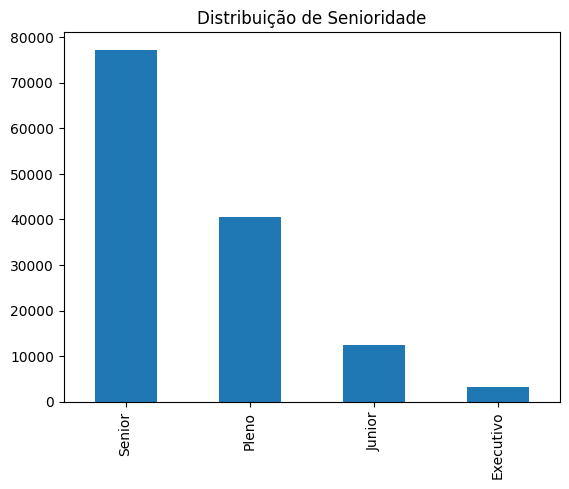

In [38]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade',xlabel="")

In [47]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

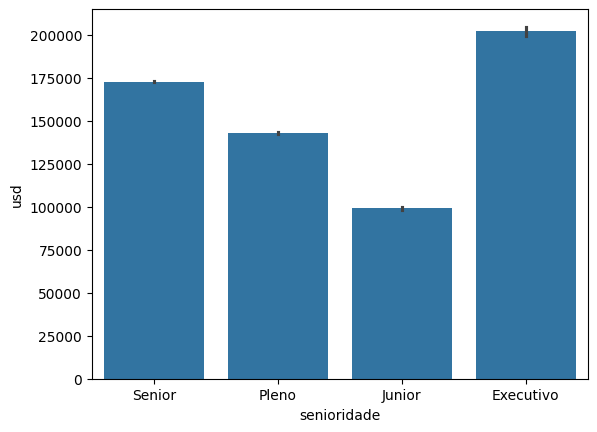

In [49]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [50]:
import matplotlib.pyplot as plt

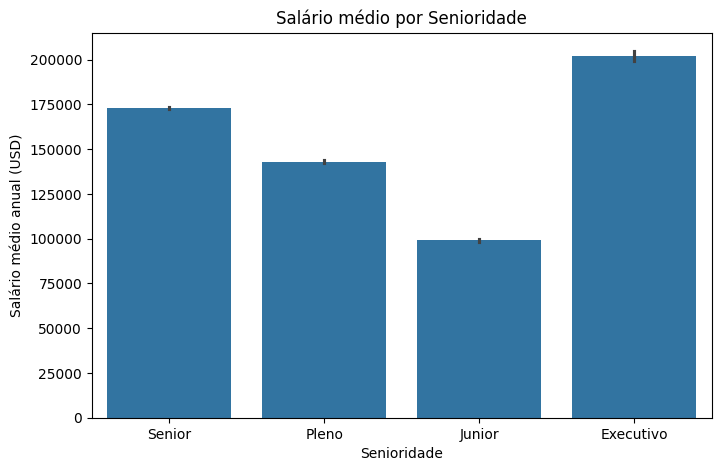

In [62]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=df_limpo['senioridade'])
plt.title('Salário médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [71]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True)

,usd
senioridade,
Junior,99034.963267
Pleno,143044.845979
Senior,172850.838301
Executivo,202027.667813


In [74]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

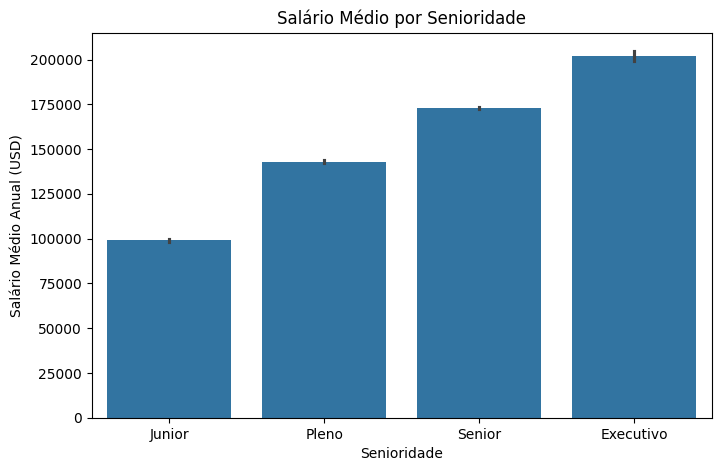

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

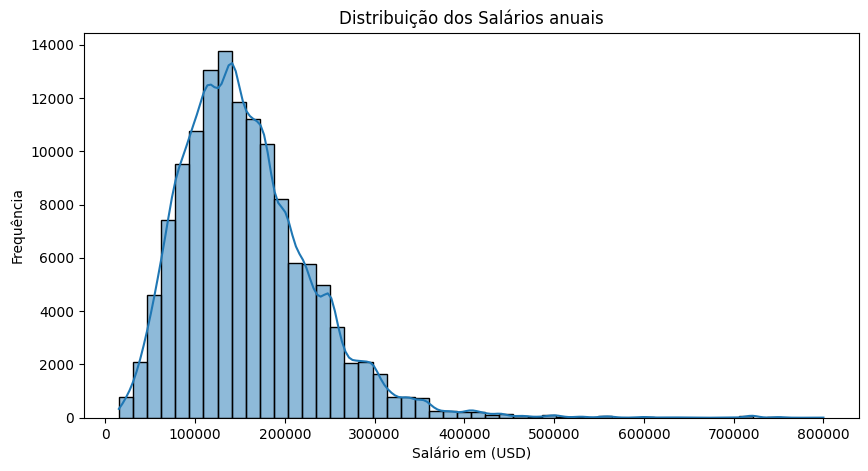

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos Salários anuais')
plt.xlabel('Salário em (USD)')
plt.ylabel('Frequência')
plt.show()

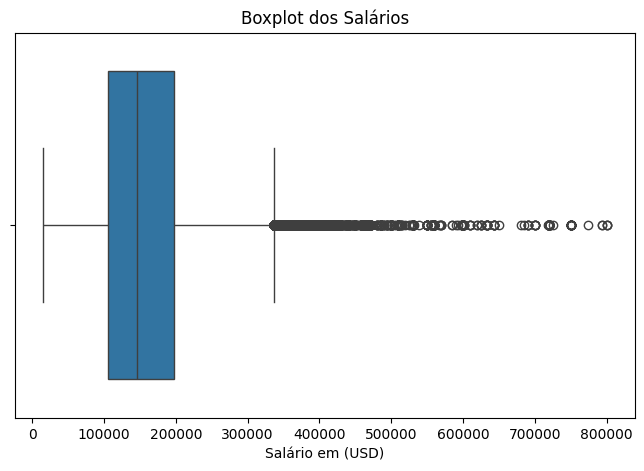

In [91]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot dos Salários')
plt.xlabel('Salário em (USD)')
plt.show()

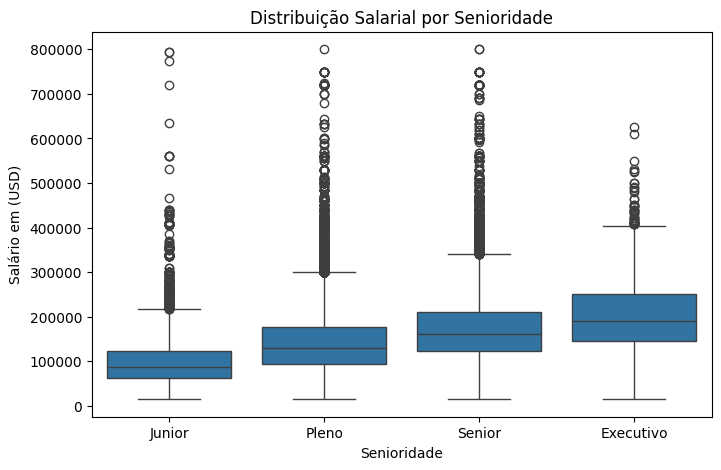

In [93]:
senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['senioridade'], y=df_limpo['usd'], data=df_limpo, order=senioridade)
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário em (USD)')
plt.show()

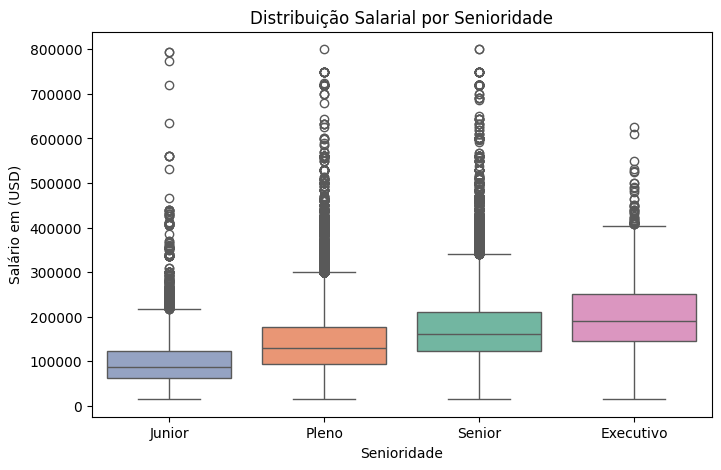

In [94]:
senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['senioridade'], y=df_limpo['usd'], data=df_limpo, order=senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário em (USD)')
plt.show()

In [95]:
import plotly.express as px

In [148]:
df_senioridade_usd = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).reset_index()
df_senioridade_usd
fig = px.bar(df_senioridade_usd, x='senioridade', y='usd', title='Média Salarial por Senioridade')
fig.show()

In [105]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem, values='quantidade', names='tipo_trabalho', title='Proporção dos tipos de trabalho')
fig.show()

In [107]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem, values='quantidade', names='tipo_trabalho', title='Proporção dos tipos de trabalho', hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()